In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
CP_LS = pd.read_csv('simulation_CP_LS.csv')
print(CP_LS.head())
nexCP_LS = pd.read_csv('simulation_nexCP_LS.csv')
print(nexCP_LS.head())
nexCP_WLS = pd.read_csv('simulation_nexCP_WLS.csv')
print(nexCP_WLS.head())


   trial  time                  setting    true_y  lower_bound  upper_bound  \
0      0   100  Setting 1 (i.i.d. data)  4.389725     0.934178     3.908040   
1      0   101  Setting 1 (i.i.d. data)  4.377630     1.967630     4.943378   
2      0   102  Setting 1 (i.i.d. data) -0.828860    -3.214483     0.055558   
3      0   103  Setting 1 (i.i.d. data) -3.284095    -4.697347    -1.626250   
4      0   104  Setting 1 (i.i.d. data) -2.039239    -4.178305    -1.124515   

   violation  
0       True  
1      False  
2      False  
3      False  
4      False  
   trial  time                  setting    true_y  lower_bound  upper_bound  \
0      0   100  Setting 1 (i.i.d. data)  4.389725     0.934178     3.924831   
1      0   101  Setting 1 (i.i.d. data)  4.377630     1.953243     5.026293   
2      0   102  Setting 1 (i.i.d. data) -0.828860    -3.225720     0.081275   
3      0   103  Setting 1 (i.i.d. data) -3.284095    -4.697347    -1.622298   
4      0   104  Setting 1 (i.i.d. data) 

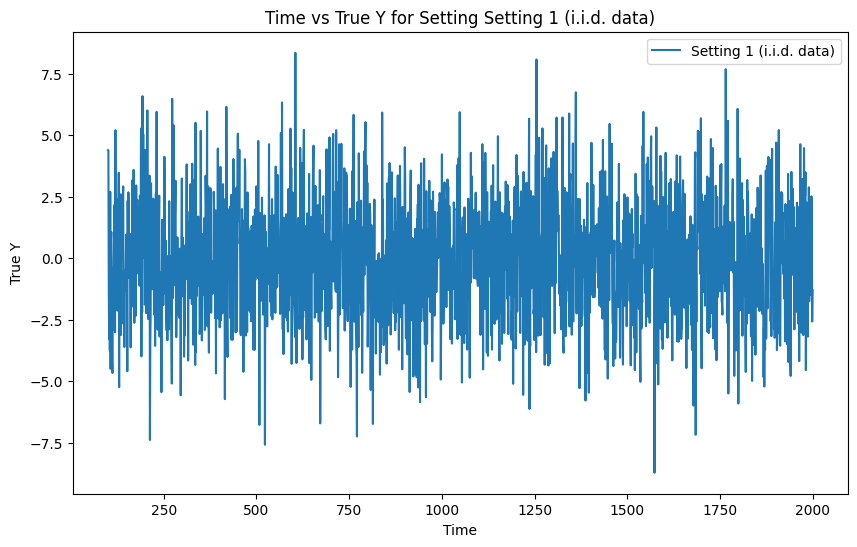

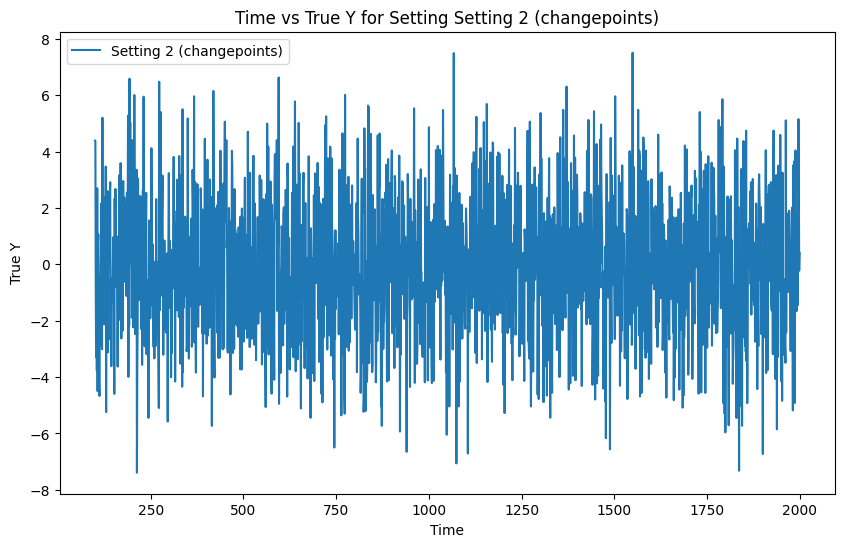

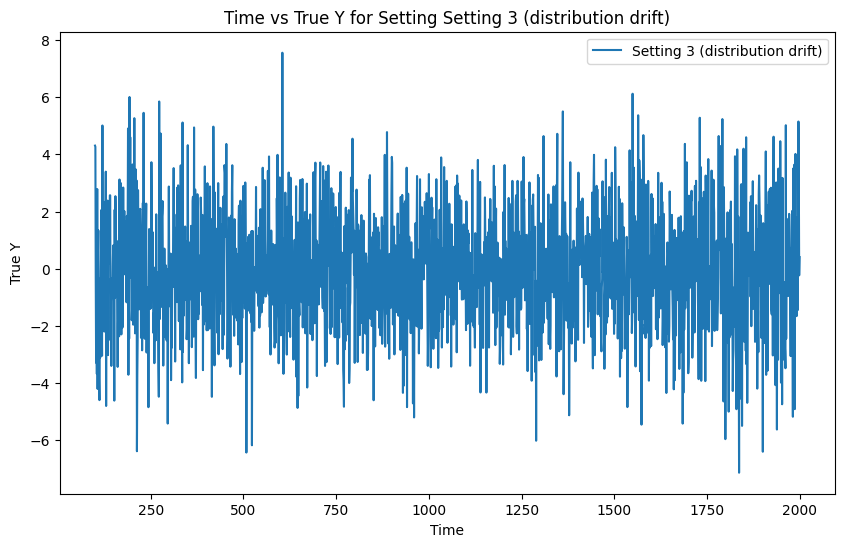

In [3]:
#for each 'setting' in CP_LS, plot the relation ship between 'time' to 'true_y', only do CP_LS, i want a line plot for each setting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for setting in CP_LS['setting'].unique():
    # filter the data for the current setting
    setting_data = CP_LS[CP_LS['setting'] == setting]
    
    # create a line plot for 'time' vs 'true_y'
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=setting_data, x='time', y='true_y', label=setting)
    
    # set the title and labels
    plt.title(f'Time vs True Y for Setting {setting}')
    plt.xlabel('Time')
    plt.ylabel('True Y')
    
    # show the legend
    plt.legend()
    
    # show the plot
    plt.show()
    

In [4]:
from TestingFramework import binomial_test, geometric_conformal_test, dynamic_binary_regression_test, diebold_mariano_test

In [5]:
#create 9 data sets: 3 methods * 3 'setting'
# Methods: CP_LS, nexCP_LS, nexCP_WLS
# Settings: Setting 1 (i.i.d. data), Setting 2 (changepoints), Setting 3 (distribution drift)

# Go through the settings and for each setting I want to know which model fails which test



In [14]:
for setting in CP_LS['setting'].unique():
    CP_LS_cov_rate = 1- CP_LS[CP_LS['setting'] == setting]['violation'].mean()
    nexCP_LS_cov_rate = 1- nexCP_LS[nexCP_LS['setting'] == setting]['violation'].mean()
    nexCP_WLS_cov_rate = 1- nexCP_WLS[nexCP_LS['setting'] == setting]['violation'].mean()
    #sum violation for each method and divide by the number of tests
    violations_CP_LS = CP_LS[CP_LS['setting'] == setting]['violation'].sum()
    violations_nexCP_LS = nexCP_LS[nexCP_LS['setting'] == setting]['violation'].sum()
    violations_nexCP_WLS = nexCP_WLS[nexCP_LS['setting'] == setting]['violation'].sum()
    #get average interval length for each method
    avg_interval_length_CP_LS = np.mean(np.abs(CP_LS[CP_LS['setting'] == setting]['lower_bound'] + CP_LS[CP_LS['setting'] == setting]['upper_bound']))
    avg_interval_length_nexCP_LS = np.mean(np.abs(nexCP_LS[nexCP_LS['setting'] == setting]['lower_bound'] + nexCP_LS[nexCP_LS['setting'] == setting]['upper_bound']))
    avg_interval_length_nexCP_WLS = np.mean(np.abs(nexCP_WLS[nexCP_LS['setting'] == setting]['lower_bound'] + nexCP_WLS[nexCP_LS['setting'] == setting]['upper_bound']))
    print(f'Setting: {setting}')
    print(f'CP_LS coverage rate: {CP_LS_cov_rate}')
    print(f'CP_LS average interval length: {avg_interval_length_CP_LS}')
    #sum
    print(f'CP_LS violations: {violations_CP_LS}')
    print(f'nexCP_LS coverage rate: {nexCP_LS_cov_rate}')
    print(f'nexCP_LS average interval length: {avg_interval_length_nexCP_LS}')
    print(f'nexCP_LS violations: {violations_nexCP_LS}')
    print(f'nexCP_WLS coverage rate: {nexCP_WLS_cov_rate}')
    print(f'nexCP_WLS average interval length: {avg_interval_length_nexCP_WLS}')
    print(f'nexCP_WLS violations: {violations_nexCP_WLS}')
    print('')

Setting: Setting 1 (i.i.d. data)
CP_LS coverage rate: 0.9057894736842105
CP_LS average interval length: 3.4892203545165357
CP_LS violations: 179
nexCP_LS coverage rate: 0.9047368421052632
nexCP_LS average interval length: 3.488800899220003
nexCP_LS violations: 181
nexCP_WLS coverage rate: 0.9042105263157895
nexCP_WLS average interval length: 3.516867451661732
nexCP_WLS violations: 182

Setting: Setting 2 (changepoints)
CP_LS coverage rate: 0.8257894736842105
CP_LS average interval length: 2.4502249783865637
CP_LS violations: 331
nexCP_LS coverage rate: 0.8878947368421053
nexCP_LS average interval length: 2.454572644534654
nexCP_LS violations: 213
nexCP_WLS coverage rate: 0.91
nexCP_WLS average interval length: 3.2787262922359695
nexCP_WLS violations: 171

Setting: Setting 3 (distribution drift)
CP_LS coverage rate: 0.8463157894736842
CP_LS average interval length: 2.7981458916578976
CP_LS violations: 292
nexCP_LS coverage rate: 0.8847368421052632
nexCP_LS average interval length: 2.798

In [7]:
# Define setting
setting = 'Setting 1 (i.i.d. data)'

# Filter datasets once
CP_LS_setting = CP_LS[CP_LS['setting'] == setting].reset_index(drop=True)
nexCP_LS_setting = nexCP_LS[nexCP_LS['setting'] == setting].reset_index(drop=True)
nexCP_WLS_setting = nexCP_WLS[nexCP_WLS['setting'] == setting].reset_index(drop=True)

# Helper function to convert p-values to text
def pass_fail(p):
    return 'Failed to reject' if p > 0.05 else 'Reject'

# 1. Binomial test
p_under_CP_LS, p_over_CP_LS, p_two_sided_CP_LS = binomial_test(CP_LS_setting['violation'], 0.1)
p_under_nexCP_LS, p_over_nexCP_LS, p_two_sided_nexCP_LS = binomial_test(nexCP_LS_setting['violation'], 0.1)
p_under_nexCP_WLS, p_over_nexCP_WLS, p_two_sided_nexCP_WLS = binomial_test(nexCP_WLS_setting['violation'], 0.1)

print('Binomial test:')
print('CP_LS: p under:', pass_fail(p_under_CP_LS), 
      'p over:', pass_fail(p_over_CP_LS), 
      'p two sided:', pass_fail(p_two_sided_CP_LS))
print('nexCP_LS: p under:', pass_fail(p_under_nexCP_LS), 
      'p over:', pass_fail(p_over_nexCP_LS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_LS))
print('nexCP_WLS: p under:', pass_fail(p_under_nexCP_WLS), 
      'p over:', pass_fail(p_over_nexCP_WLS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_WLS))
print('')

# 2. Geometric conformal test
pval_LRUC_CP_LS, pval_LRInd_CP_LS, pval_LRJoint_CP_LS = geometric_conformal_test(CP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_LS, pval_LRInd_nexCP_LS, pval_LRJoint_nexCP_LS = geometric_conformal_test(nexCP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_WLS, pval_LRInd_nexCP_WLS, pval_LRJoint_nexCP_WLS = geometric_conformal_test(nexCP_WLS_setting['violation'], 0.1)

print('Geometric conformal test:')
print('CP_LS: LRUC:', pass_fail(pval_LRUC_CP_LS), 
      'LRInd:', pass_fail(pval_LRInd_CP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_CP_LS))
print('nexCP_LS: LRUC:', pass_fail(pval_LRUC_nexCP_LS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_LS))
print('nexCP_WLS: LRUC:', pass_fail(pval_LRUC_nexCP_WLS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_WLS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_WLS))
print('')

# 3. Dynamic binary regression test
p_value_CP_LS = dynamic_binary_regression_test(CP_LS_setting['true_y'], CP_LS_setting['violation'], CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_LS = dynamic_binary_regression_test(nexCP_LS_setting['true_y'], nexCP_LS_setting['violation'], nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_WLS = dynamic_binary_regression_test(nexCP_WLS_setting['true_y'], nexCP_WLS_setting['violation'], nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'], 0.1)

print('Dynamic binary regression test:')
print('CP_LS:', pass_fail(p_value_CP_LS))
print('nexCP_LS:', pass_fail(p_value_nexCP_LS))
print('nexCP_WLS:', pass_fail(p_value_nexCP_WLS))
print('')




Binomial test:
CP_LS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject
nexCP_LS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject
nexCP_WLS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject

Geometric conformal test:
CP_LS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject
nexCP_LS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject
nexCP_WLS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject

Dynamic binary regression test:
CP_LS: Failed to reject
nexCP_LS: Failed to reject
nexCP_WLS: Failed to reject



In [8]:
# Define setting
setting = 'Setting 2 (changepoints)'

# Filter datasets once
CP_LS_setting = CP_LS[CP_LS['setting'] == setting].reset_index(drop=True)
nexCP_LS_setting = nexCP_LS[nexCP_LS['setting'] == setting].reset_index(drop=True)
nexCP_WLS_setting = nexCP_WLS[nexCP_WLS['setting'] == setting].reset_index(drop=True)

# Helper function to convert p-values to text
def pass_fail(p):
    return 'Failed to reject' if p > 0.05 else 'Reject'

# 1. Binomial test
p_under_CP_LS, p_over_CP_LS, p_two_sided_CP_LS = binomial_test(CP_LS_setting['violation'], 0.1)
p_under_nexCP_LS, p_over_nexCP_LS, p_two_sided_nexCP_LS = binomial_test(nexCP_LS_setting['violation'], 0.1)
p_under_nexCP_WLS, p_over_nexCP_WLS, p_two_sided_nexCP_WLS = binomial_test(nexCP_WLS_setting['violation'], 0.1)

print('Binomial test:')
print('CP_LS: p under:', pass_fail(p_under_CP_LS), 
      'p over:', pass_fail(p_over_CP_LS), 
      'p two sided:', pass_fail(p_two_sided_CP_LS))
print('nexCP_LS: p under:', pass_fail(p_under_nexCP_LS), 
      'p over:', pass_fail(p_over_nexCP_LS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_LS))
print('nexCP_WLS: p under:', pass_fail(p_under_nexCP_WLS), 
      'p over:', pass_fail(p_over_nexCP_WLS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_WLS))
print('')

# 2. Geometric conformal test
pval_LRUC_CP_LS, pval_LRInd_CP_LS, pval_LRJoint_CP_LS = geometric_conformal_test(CP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_LS, pval_LRInd_nexCP_LS, pval_LRJoint_nexCP_LS = geometric_conformal_test(nexCP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_WLS, pval_LRInd_nexCP_WLS, pval_LRJoint_nexCP_WLS = geometric_conformal_test(nexCP_WLS_setting['violation'], 0.1)

print('Geometric conformal test:')
print('CP_LS: LRUC:', pass_fail(pval_LRUC_CP_LS), 
      'LRInd:', pass_fail(pval_LRInd_CP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_CP_LS))
print('nexCP_LS: LRUC:', pass_fail(pval_LRUC_nexCP_LS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_LS))
print('nexCP_WLS: LRUC:', pass_fail(pval_LRUC_nexCP_WLS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_WLS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_WLS))
print('')

# 3. Dynamic binary regression test
p_value_CP_LS = dynamic_binary_regression_test(CP_LS_setting['true_y'], CP_LS_setting['violation'], CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_LS = dynamic_binary_regression_test(nexCP_LS_setting['true_y'], nexCP_LS_setting['violation'], nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_WLS = dynamic_binary_regression_test(nexCP_WLS_setting['true_y'], nexCP_WLS_setting['violation'], nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'], 0.1)

print('Dynamic binary regression test:')
print('CP_LS:', pass_fail(p_value_CP_LS))
print('nexCP_LS:', pass_fail(p_value_nexCP_LS))
print('nexCP_WLS:', pass_fail(p_value_nexCP_WLS))
print('')


Binomial test:
CP_LS: p under: Reject p over: Failed to reject p two sided: Reject
nexCP_LS: p under: Reject p over: Failed to reject p two sided: Failed to reject
nexCP_WLS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject

Geometric conformal test:
CP_LS: LRUC: Reject LRInd: Failed to reject LRJoint: Reject
nexCP_LS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject
nexCP_WLS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject

Dynamic binary regression test:
CP_LS: Reject
nexCP_LS: Failed to reject
nexCP_WLS: Reject



In [9]:
# Define setting
setting = 'Setting 3 (distribution drift)'

# Filter datasets once
CP_LS_setting = CP_LS[CP_LS['setting'] == setting].reset_index(drop=True)
nexCP_LS_setting = nexCP_LS[nexCP_LS['setting'] == setting].reset_index(drop=True)
nexCP_WLS_setting = nexCP_WLS[nexCP_WLS['setting'] == setting].reset_index(drop=True)

# Helper function to convert p-values to text
def pass_fail(p):
    return 'Failed to reject' if p > 0.05 else 'Reject'

# 1. Binomial test
p_under_CP_LS, p_over_CP_LS, p_two_sided_CP_LS = binomial_test(CP_LS_setting['violation'], 0.1)
p_under_nexCP_LS, p_over_nexCP_LS, p_two_sided_nexCP_LS = binomial_test(nexCP_LS_setting['violation'], 0.1)
p_under_nexCP_WLS, p_over_nexCP_WLS, p_two_sided_nexCP_WLS = binomial_test(nexCP_WLS_setting['violation'], 0.1)

print('Binomial test:')
print('CP_LS: p under:', pass_fail(p_under_CP_LS), 
      'p over:', pass_fail(p_over_CP_LS), 
      'p two sided:', pass_fail(p_two_sided_CP_LS))
print('nexCP_LS: p under:', pass_fail(p_under_nexCP_LS), 
      'p over:', pass_fail(p_over_nexCP_LS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_LS))
print('nexCP_WLS: p under:', pass_fail(p_under_nexCP_WLS), 
      'p over:', pass_fail(p_over_nexCP_WLS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_WLS))
print('')

# 2. Geometric conformal test
pval_LRUC_CP_LS, pval_LRInd_CP_LS, pval_LRJoint_CP_LS = geometric_conformal_test(CP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_LS, pval_LRInd_nexCP_LS, pval_LRJoint_nexCP_LS = geometric_conformal_test(nexCP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_WLS, pval_LRInd_nexCP_WLS, pval_LRJoint_nexCP_WLS = geometric_conformal_test(nexCP_WLS_setting['violation'], 0.1)

print('Geometric conformal test:')
print('CP_LS: LRUC:', pass_fail(pval_LRUC_CP_LS), 
      'LRInd:', pass_fail(pval_LRInd_CP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_CP_LS))
print('nexCP_LS: LRUC:', pass_fail(pval_LRUC_nexCP_LS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_LS))
print('nexCP_WLS: LRUC:', pass_fail(pval_LRUC_nexCP_WLS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_WLS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_WLS))
print('')

# 3. Dynamic binary regression test
p_value_CP_LS = dynamic_binary_regression_test(CP_LS_setting['true_y'], CP_LS_setting['violation'], CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_LS = dynamic_binary_regression_test(nexCP_LS_setting['true_y'], nexCP_LS_setting['violation'], nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_WLS = dynamic_binary_regression_test(nexCP_WLS_setting['true_y'], nexCP_WLS_setting['violation'], nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'], 0.1)

print('Dynamic binary regression test:')
print('CP_LS:', pass_fail(p_value_CP_LS))
print('nexCP_LS:', pass_fail(p_value_nexCP_LS))
print('nexCP_WLS:', pass_fail(p_value_nexCP_WLS))
print('')


Binomial test:
CP_LS: p under: Reject p over: Failed to reject p two sided: Reject
nexCP_LS: p under: Reject p over: Failed to reject p two sided: Reject
nexCP_WLS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject

Geometric conformal test:
CP_LS: LRUC: Reject LRInd: Failed to reject LRJoint: Reject
nexCP_LS: LRUC: Reject LRInd: Failed to reject LRJoint: Failed to reject
nexCP_WLS: LRUC: Failed to reject LRInd: Failed to reject LRJoint: Failed to reject

Dynamic binary regression test:
CP_LS: Reject
nexCP_LS: Failed to reject
nexCP_WLS: Failed to reject



In [11]:
# 4. Diebold-Mariano test
p_values_CP_LS_nexCP_LS = []
DM_stats_CP_LS_nexCP_LS = []
p_values_CP_LS_nexCP_WLS = []
DM_stats_CP_LS_nexCP_WLS = []
p_values_nexCP_LS_nexCP_WLS = []
DM_stats_nexCP_LS_nexCP_WLS = []

for setting in CP_LS['setting'].unique():
    CP_LS_setting = CP_LS[CP_LS['setting'] == setting].reset_index(drop=True)
    nexCP_LS_setting = nexCP_LS[nexCP_LS['setting'] == setting].reset_index(drop=True)
    nexCP_WLS_setting = nexCP_WLS[nexCP_WLS['setting'] == setting].reset_index(drop=True)

    # 1. CP_LS vs nexCP_LS
    print(f"Setting: {setting}")
    print("Battle 1 (CP_LS vs nexCP_LS):")
    dmstat_cp_lsnex, pval_cp_lsnex = diebold_mariano_test(
        CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'],
        nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'],
        nexCP_LS_setting['true_y'], 0.1
    )
    p_values_CP_LS_nexCP_LS.append(pval_cp_lsnex)
    DM_stats_CP_LS_nexCP_LS.append(dmstat_cp_lsnex)

    # 2. CP_LS vs nexCP_WLS
    print("Battle 2 (CP_LS vs nexCP_WLS):")
    print(f"Setting: {setting}")
    dmstat_cp_lswls, pval_cp_lswls = diebold_mariano_test(
        CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'],
        nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'],
        nexCP_WLS_setting['true_y'], 0.1
    )
    p_values_CP_LS_nexCP_WLS.append(pval_cp_lswls)
    DM_stats_CP_LS_nexCP_WLS.append(dmstat_cp_lswls)

    # 3. nexCP_LS vs nexCP_WLS
    print("Battle 3 (nexCP_LS vs nexCP_WLS):")
    print(f"Setting: {setting}")
    dmstat_nex_lswls, pval_nex_lswls = diebold_mariano_test(
        nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'],
        nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'],
        nexCP_LS_setting['true_y'], 0.1
    )
    p_values_nexCP_LS_nexCP_WLS.append(pval_nex_lswls)
    DM_stats_nexCP_LS_nexCP_WLS.append(dmstat_nex_lswls)

# Now correct printing
for i, setting in enumerate(CP_LS['setting'].unique()):
    print(f"Setting: {setting}")
    print(f"1. CP_LS vs nexCP_LS: p-value: {p_values_CP_LS_nexCP_LS[i]}, DM statistic: {DM_stats_CP_LS_nexCP_LS[i]}")
    print(f"2. CP_LS vs nexCP_WLS: p-value: {p_values_CP_LS_nexCP_WLS[i]}, DM statistic: {DM_stats_CP_LS_nexCP_WLS[i]}")
    print(f"3. nexCP_LS vs nexCP_WLS: p-value: {p_values_nexCP_LS_nexCP_WLS[i]}, DM statistic: {DM_stats_nexCP_LS_nexCP_WLS[i]}")
    print("")




Setting: Setting 1 (i.i.d. data)
Battle 1 (CP_LS vs nexCP_LS):
Mean of d: -0.0014170753572112348
DM variance: 0.0022692262144917096
DM stat: -0.02974774498346012, p-value: 0.9762682337626578
Battle 2 (CP_LS vs nexCP_WLS):
Setting: Setting 1 (i.i.d. data)
Mean of d: -0.02998295578081754
DM variance: 0.00522429255179263
DM stat: -0.41482096732450147, p-value: 0.6782729692039098
Battle 3 (nexCP_LS vs nexCP_WLS):
Setting: Setting 1 (i.i.d. data)
Mean of d: -0.028565880423606308
DM variance: 0.003371837253839987
DM stat: -0.4919424634561977, p-value: 0.6227600184371558
Setting: Setting 2 (changepoints)
Battle 1 (CP_LS vs nexCP_LS):
Mean of d: 1.1570744120053251
DM variance: 0.31924401031794825
DM stat: 2.0478583377045636, p-value: 0.040573882156444085
Battle 2 (CP_LS vs nexCP_WLS):
Setting: Setting 2 (changepoints)
Mean of d: 4.7443878035845675
DM variance: 0.9507027330060186
DM stat: 4.865839836089132, p-value: 1.1397178929506424e-06
Battle 3 (nexCP_LS vs nexCP_WLS):
Setting: Setting 2 (ch

In [12]:
# Loop over settings
for i, setting in enumerate(CP_LS['setting'].unique()):
    print(f"Setting: {setting}")
    
    # 1. CP_LS vs nexCP_LS
    if p_values_CP_LS_nexCP_LS[i] < 0.05:
        if DM_stats_CP_LS_nexCP_LS[i] < 0:
            print("  Battle 1 (CP_LS vs nexCP_LS): CP_LS is better")
        else:
            print("  Battle 1 (CP_LS vs nexCP_LS): nexCP_LS is better")
    else:
        print("  Battle 1 (CP_LS vs nexCP_LS): Tie (uncertain)")
    
    # 2. CP_LS vs nexCP_WLS
    if p_values_CP_LS_nexCP_WLS[i] < 0.05:
        if DM_stats_CP_LS_nexCP_WLS[i] < 0:
            print("  Battle 2 (CP_LS vs nexCP_WLS): CP_LS is better")
        else:
            print("  Battle 2 (CP_LS vs nexCP_WLS): nexCP_WLS is better")
    else:
        print("  Battle 2 (CP_LS vs nexCP_WLS): Tie (uncertain)")
    
    # 3. nexCP_LS vs nexCP_WLS
    if p_values_nexCP_LS_nexCP_WLS[i] < 0.05:
        if DM_stats_nexCP_LS_nexCP_WLS[i] < 0:
            print("  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_LS is better")
        else:
            print("  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_WLS is better")
    else:
        print("  Battle 3 (nexCP_LS vs nexCP_WLS): Tie (uncertain)")
    
    print('')  # Space between settings

Setting: Setting 1 (i.i.d. data)
  Battle 1 (CP_LS vs nexCP_LS): Tie (uncertain)
  Battle 2 (CP_LS vs nexCP_WLS): Tie (uncertain)
  Battle 3 (nexCP_LS vs nexCP_WLS): Tie (uncertain)

Setting: Setting 2 (changepoints)
  Battle 1 (CP_LS vs nexCP_LS): nexCP_LS is better
  Battle 2 (CP_LS vs nexCP_WLS): nexCP_WLS is better
  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_WLS is better

Setting: Setting 3 (distribution drift)
  Battle 1 (CP_LS vs nexCP_LS): Tie (uncertain)
  Battle 2 (CP_LS vs nexCP_WLS): nexCP_WLS is better
  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_WLS is better

